In [1]:
%load_ext autoreload
%autoreload 2

import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from typing import List
from time import time
from utils import get_long, get_lat, load_img

In [11]:
x = 464999
y = 5767000

radius = 100

In [3]:
def stitch_images(file_paths: List[str]) -> np.ndarray: 
    # takes 2 to 4 images and stitches them together
    map_list = []
    iterations = len(file_paths) // 2
    for i in range(iterations):
        if get_long(file_paths[i*2]) == get_long(file_paths[i*2+1]):
            print("Longitude is same")
            print(f"Load files {file_paths[i*2]} and {file_paths[i*2+1]}")
            img1, img2 = load_img(file_paths[i*2]), load_img(file_paths[i*2+1])
            print(f"Concat files {file_paths[i*2]} and {file_paths[i*2+1]} along the Y-axis")
            conc_long = np.concatenate((img2, img1), axis=0)
            map_list.append(conc_long)
        else:
            print("Latitude is same")
            print(f"Load files {file_paths[i*2]} and {file_paths[i*2+1]}")
            img1, img2 = load_img(file_paths[i*2]), load_img(file_paths[i*2+1])
            print(f"Concat files {file_paths[i*2]} and {file_paths[i*2+1]} along the X-axis")
            conc_lat = np.concatenate((img1, img2), axis=1) 
            map_list.append(conc_lat)
    if len(map_list) > 1:
        _map = np.concatenate((map_list[0], map_list[1]), axis=1)
        return _map
    return map_list[0]

In [10]:
def get_image_coords(file_paths: str, ) -> tuple[int]:
    image_xs = [get_long(file) for file in file_paths]
    image_min_x, image_max_x = min(image_xs), max(image_xs) + 9000
    image_ys = [get_lat(file) for file in file_paths]
    image_min_y, image_max_y = min(image_ys), max(image_ys) + 9000

    return image_min_x, image_max_x, image_min_y, image_max_y

In [4]:
def crop_and_resize(image: np.ndarray, radius: int) -> Image:
    pass

We need to do some stitching !
Longitude is same
Load files data/orthophotos/nw/dop10rgbi_32_464_5766_1_nw_2022.jp2 and data/orthophotos/nw/dop10rgbi_32_464_5767_1_nw_2022.jp2


/Users/pt/hacking/hire-me/.venv/lib/python3.10/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Concat files data/orthophotos/nw/dop10rgbi_32_464_5766_1_nw_2022.jp2 and data/orthophotos/nw/dop10rgbi_32_464_5767_1_nw_2022.jp2 along the Y-axis
Longitude is same
Load files data/orthophotos/nw/dop10rgbi_32_465_5766_1_nw_2022.jp2 and data/orthophotos/nw/dop10rgbi_32_465_5767_1_nw_2022.jp2
Concat files data/orthophotos/nw/dop10rgbi_32_465_5766_1_nw_2022.jp2 and data/orthophotos/nw/dop10rgbi_32_465_5767_1_nw_2022.jp2 along the Y-axis


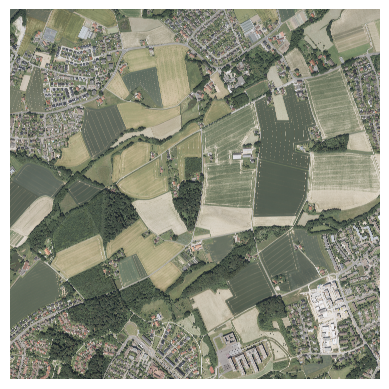

In [14]:
# def get_files(lat: int, long: int, radius: int = 100, data_dir: str = "data/orthophotos/nw/") -> list[str]:
    # return all necessary filenames for the requested range

data_dir = "data/orthophotos/nw"
file_names = sorted(os.listdir(data_dir))

# determine the available range in our data and check if the desired values fit
file_longs = [get_long(file_path=file_name) for file_name in file_names]
file_lats = [get_lat(file_path=file_name) for file_name in file_names]

file_min_long, file_max_long = min(file_longs), max(file_longs) + 999
file_min_lat, file_max_lat = min(file_lats), max(file_lats) + 999

assert file_min_long <= x <= file_max_long, f"Longitude value should be between {file_min_long} and {file_max_long}. Actual value: {long}"
assert file_min_lat <= y <= file_max_lat, f"Latitude value should be between {file_min_lat} and {file_max_lat}. Actual value: {lat}"

# determine the desired area to choose files
x_range_min, x_range_max = x - radius, x + radius
y_range_min, y_range_max = y - radius, y + radius

# get all files for the longitudinal fit
long_files = [file for file in file_names if (str(int(x_range_min/1000)) in file or str(int(x_range_max / 1000)) in file)]
# from those get all the files for the latitudinal range
target_files = [file for file in long_files if (str(int(y_range_min/1000)) in file or str(int(y_range_max / 1000)) in file)]
target_files = [f"{data_dir}/{file}" for file in target_files]
# now these files would need to be stitched together:
if len(target_files) == 1:
    _map = target_files[0]
elif len(target_files) > 1:
    print("We need to do some stitching !")
    _map = stitch_images(target_files)


big_img = Image.fromarray(_map)
plt.imshow(big_img)
plt.axis("off")
plt.show()

x_min, x_max, y_min, y_max = get_image_coords(target_files)
x_start = x_range_min - x_min
x_end = x_range_max - x_max
y_start = y_range_min - y_min
y_end = y_range_max - y_min

# TODO: draw a red cross where the desired point should be
crop = _map[y_start:y_end, x_start:x_end]


# TODO: resize to 256x256
# _map = _map.resize((256, 256))

In [15]:
plt.imshow(Image.fromarray(crop))
plt.axis("off")
plt.show()

In [12]:
x_min, x_max, y_min, y_max = get_image_coords(target_files)
x_start = x_range_min - x_min
x_end = x_range_max - x_max
y_start = y_range_min - y_min
y_end = y_range_max - y_min

# TODO: draw a red cross where the desired point should be
crop = _map[y_start:y_end, x_start:x_end]

NameError: name 'x_range_min' is not defined

In [7]:
image_longs = [get_long(file) for file in target_files]
image_min_long, image_max_long = min(image_longs), max(image_longs) + 9000
image_lats = [get_lat(file) for file in target_files]
image_min_lats, image_max_lats = min(image_lats), max(image_lats) + 9000

In [8]:
print(image_min_long, image_max_long)
print(image_min_lats, image_max_lats)

464000 474000
5766000 5776000


In [71]:
print(long_range_min, long_range_max)
print(lat_range_min, lat_range_max)

464899 465099
5766900 5767100


In [28]:
_map.save("quad.jpeg", format="jpeg")

In [35]:
# long = 464999
# lat = 5767555
target_files

['data/orthophotos/nw/dop10rgbi_32_464_5767_1_nw_2022.jp2',
 'data/orthophotos/nw/dop10rgbi_32_465_5767_1_nw_2022.jp2']

In [38]:
# long = 464000
# lat = 5767555
target_files

['data/orthophotos/nw/dop10rgbi_32_463_5767_1_nw_2022.jp2',
 'data/orthophotos/nw/dop10rgbi_32_464_5767_1_nw_2022.jp2']

In [15]:
target_files

['data/orthophotos/nw/dop10rgbi_32_464_5767_1_nw_2022.jp2',
 'data/orthophotos/nw/dop10rgbi_32_464_5768_1_nw_2022.jp2',
 'data/orthophotos/nw/dop10rgbi_32_465_5767_1_nw_2022.jp2',
 'data/orthophotos/nw/dop10rgbi_32_465_5768_1_nw_2022.jp2']

In [62]:
target_files

['data/orthophotos/nw/dop10rgbi_32_464_5766_1_nw_2022.jp2',
 'data/orthophotos/nw/dop10rgbi_32_464_5767_1_nw_2022.jp2',
 'data/orthophotos/nw/dop10rgbi_32_465_5766_1_nw_2022.jp2',
 'data/orthophotos/nw/dop10rgbi_32_465_5767_1_nw_2022.jp2']

In [20]:
for i in range(iterations):
    print(i*2, i*2+1)

0 1
2 3


In [48]:
img1, img2 = load_img('data/orthophotos/nw/dop10rgbi_32_464_5767_1_nw_2022.jp2'), load_img('data/orthophotos/nw/dop10rgbi_32_464_5768_1_nw_2022.jp2')

/Users/pt/hacking/hire-me/.venv/lib/python3.10/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [49]:
img3, img4 = load_img('data/orthophotos/nw/dop10rgbi_32_465_5767_1_nw_2022.jp2'), load_img('data/orthophotos/nw/dop10rgbi_32_465_5768_1_nw_2022.jp2')

In [50]:
pil_1, pil_2, pil_3, pil_4 = Image.fromarray(img1), Image.fromarray(img2), Image.fromarray(img3), Image.fromarray(img4)

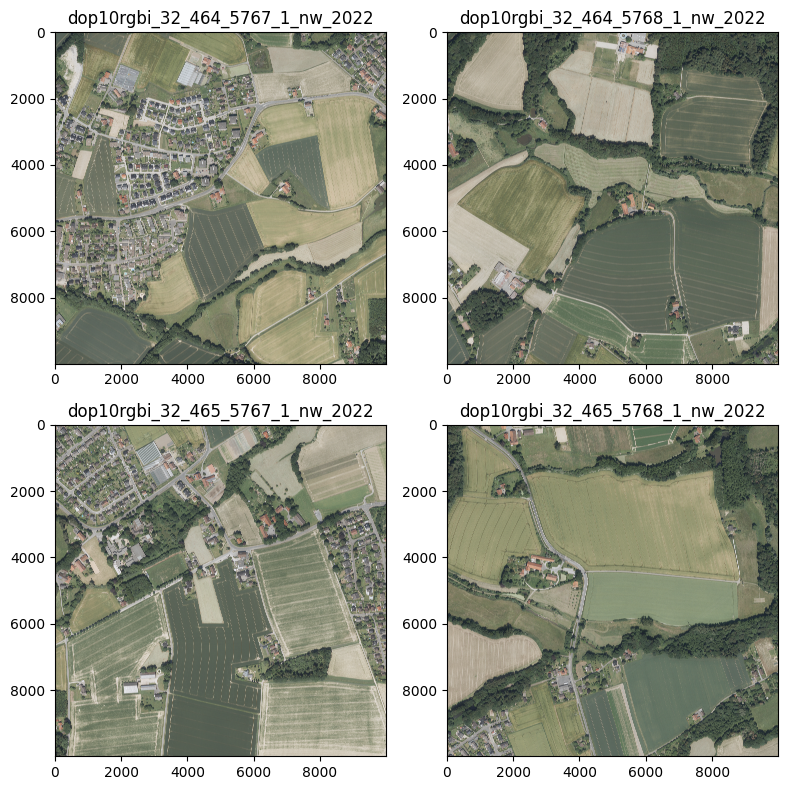

In [54]:
fig, axes = plt.subplots(2,2, figsize=(8,8))
axes[0, 0].imshow(pil_1)
axes[0, 0].set_title("dop10rgbi_32_464_5767")
axes[0, 1].imshow(pil_2)
axes[0, 1].set_title("dop10rgbi_32_464_5768")
axes[1, 0].imshow(pil_3)
axes[1, 0].set_title("dop10rgbi_32_465_5767")
axes[1, 1].imshow(pil_4)
axes[1, 1].set_title("dop10rgbi_32_465_5768")

plt.tight_layout()
plt.show()

In [55]:
map_list = []
iterations = len(target_files) // 2
for i in range(iterations):
    if get_long(target_files[i*2]) == get_long(target_files[i*2+1]):
        print("Longitude is same")
        print(f"Load files {target_files[i*2]} and {target_files[i*2+1]}")
        img1, img2 = load_img(target_files[i*2]), load_img(target_files[i*2+1])
        print(f"Concat files {target_files[i*2]} and {target_files[i*2+1]} along the Y-axis")
        # the way it is sorted, the higher value lat should be above
        conc_long = np.concatenate((img2, img1), axis=0)
        map_list.append(conc_long)
    else:
        print("Latitude is same")
        print(f"Load files {target_files[i*2]} and {target_files[i*2+1]}")
        img1, img2 = load_img(target_files[i*2]), load_img(target_files[i*2+1])
        print(f"Concat files {target_files[i*2]} and {target_files[i*2+1]} along the X-axis")
        conc_lat = np.concatenate((img1, img2), axis=1) 
        map_list.append(conc_lat)
if len(map_list) > 1:
    _map = np.concatenate((map_list[0], map_list[1]), axis=1)
else:
    _map = map_list[0]

Longitude is same
Load files data/orthophotos/nw/dop10rgbi_32_464_5767_1_nw_2022.jp2 and data/orthophotos/nw/dop10rgbi_32_464_5768_1_nw_2022.jp2


/Users/pt/hacking/hire-me/.venv/lib/python3.10/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (100000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Concat files data/orthophotos/nw/dop10rgbi_32_464_5767_1_nw_2022.jp2 and data/orthophotos/nw/dop10rgbi_32_464_5768_1_nw_2022.jp2 along the Y-axis
Longitude is same
Load files data/orthophotos/nw/dop10rgbi_32_465_5767_1_nw_2022.jp2 and data/orthophotos/nw/dop10rgbi_32_465_5768_1_nw_2022.jp2
Concat files data/orthophotos/nw/dop10rgbi_32_465_5767_1_nw_2022.jp2 and data/orthophotos/nw/dop10rgbi_32_465_5768_1_nw_2022.jp2 along the Y-axis


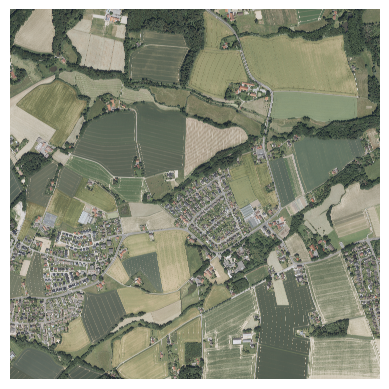

In [57]:
conc1 = np.concatenate((map_list[0], map_list[1]), axis=1)
img1 = Image.fromarray(conc1)
plt.imshow(img1)
plt.axis("off")
plt.show()

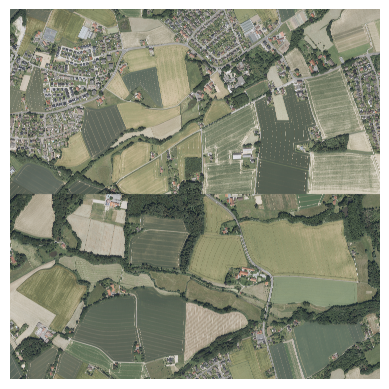

In [36]:
conc2 = np.concatenate((map_list[0], map_list[1]), axis=1)
img2 = Image.fromarray(conc2)
plt.imshow(img2)
plt.axis("off")
plt.show()

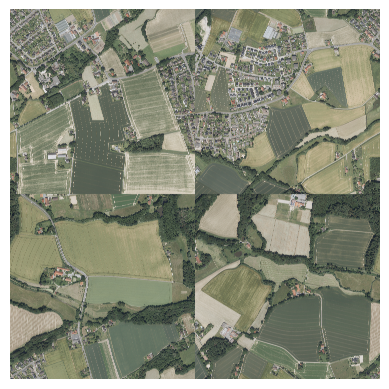

In [37]:
conc3 = np.concatenate((map_list[1], map_list[0]), axis=1)
img3 = Image.fromarray(conc3)
plt.imshow(img3)
plt.axis("off")
plt.show()

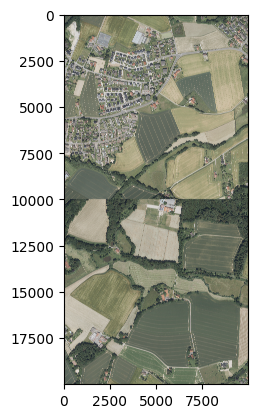

In [47]:
plt.imshow(Image.fromarray(map_list[0]))

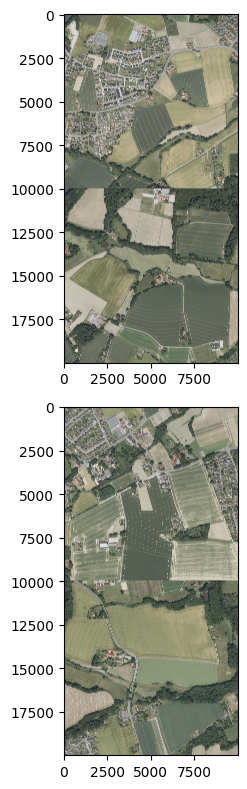

In [44]:
img1 = Image.fromarray(map_list[0])
img2 = Image.fromarray(map_list[1])

fig, axes = plt.subplots(2,1, figsize=(8,8))
axes[0].imshow(img1)
axes[1].imshow(img2)

plt.tight_layout()
plt.show()